In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Global Variables

In [2]:
start, end = '2020-03-06', '2021-01-27' #postings df
start_lockdown1, start_lockdown2, start_lockdown3 = '2020-03-16', '2020-11-17', '2020-12-26'
end_lockdown1, end_lockdown2, end_lockdown3 = '2020-04-20', '2020-12-06', '2021-02-07'
input_postings = r'../data/preprocessing/combined_postings_final.pickle'
input_survey = r'../data/survey_data_covid_variables.csv'

### Load datasets

Load and analyize survey dataset:

In [3]:
survey = pd.read_csv(input_survey)

e:\users\moritz\dokumente\uni\ipds_standardforum\venv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (27,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
survey.head()

,welle,co01,co02,co02_09,co02_01,co02_02,co02_03,co02_04,co02_05,co02_06,...,co21_04,co21_05,co21_06,co21_07,co21_08,co21_09,co21_10,co21_11,co22,co23
0,1,4,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,1,1,1,1,2,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,4,1,2,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(survey['co05_01']), len(survey[survey['co05_01'] == -9]), (survey['co05_01'].isnull().sum()), (survey['co05_01'].isna().sum())

(12029, 0, 0, 0)

In [6]:
len(survey['co19_01']), len(survey[survey['co19_01'] == -9]), (survey['co19_01'].isnull().sum()), (survey['co19_01'].isna().sum())

(12029, 0, 9018, 9018)

In [7]:
survey_sub = survey[['welle', 'co05_01']] # ,'co19_01']]
# co05_01: Die derzeit gültigen von der Regierung ergriffenen Maßnahmen zur Eindämmung der Covid-19 Pandemie sollten..."
#    values: 1 - 3 (=mehr maßnahmen)
# co19_01: Wie schätzen Sie Ihren Informationsstand rund um die aktuellen Verordnungen/Maßnahmen, die im Rahmen der Covid-.."
#    values: 1 - 5 (=gute kommunikation)

In [8]:
wave_map = {
    1: pd.to_datetime('5.5.2020'),
    2: pd.to_datetime('5.28.2020'),
    3: pd.to_datetime('6.17.2020'),
    4: pd.to_datetime('7.8.2020'),
    5: pd.to_datetime('7.30.2020'),
    6: pd.to_datetime('8.22.2020'),
    7: pd.to_datetime('9.14.2020'),
    8: pd.to_datetime('9.29.2020'),
    9: pd.to_datetime('10.21.2020'),
    10: pd.to_datetime('11.11.2020'),
    11: pd.to_datetime('11.28.2020'),
    12: pd.to_datetime('12.22.2020'),
}

In [9]:
survey_sub['wave_end'] = pd.to_datetime(survey_sub['welle'].map(wave_map))

<ipython-input-9-82dcc5cc7d1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_sub['wave_end'] = pd.to_datetime(survey_sub['welle'].map(wave_map))


In [10]:
survey_sub = survey_sub.set_index('wave_end')
#survey_sub = survey_sub.drop(['welle'], axis=1)

Load and analyze postings dataset:

In [11]:
cols_to_drop = ['rid', 'ppid', 'o', 'hl', 'tx', 'cn', '13', '16', '17', '19', '31', '200', 'pid_liwc']
postings = pd.read_pickle(input_postings).drop(cols_to_drop, axis=1)

In [12]:
postings.index = pd.to_datetime(postings.index, utc=True)

In [13]:
postings['anger'] = postings['18']/postings['number_tokens']

In [14]:
postings.head()

,oid,pid,vp,vn,allText,18,number_tokens,anger
cd,,,,,,,,
2020-12-31 19:04:57.643000+00:00,2000122865130,1064710786,4,0,Herr Bundespräsidentnach Artikel 70 B-VG könne...,0,28,0.0
2021-01-01 05:00:14.350000+00:00,2000122865130,1064724063,2,0,Der Flash wird noch eine weitere Amtszeit dafü...,0,9,0.0
2020-12-31 19:57:02.017000+00:00,2000122865130,1064712838,2,0,Das ist wahrscheinlich sogar unserem HBP zu pe...,0,8,0.0
2020-12-31 18:09:04.760000+00:00,2000122865130,1064708391,3,0,Ausnahmegesetze für unseren Ausnahmenkanzler ...,0,4,0.0
2020-12-31 17:43:57.973000+00:00,2000122865130,1064707195,3,0,Anschober will...Anschober kann aber nicht.,0,5,0.0


<AxesSubplot:>

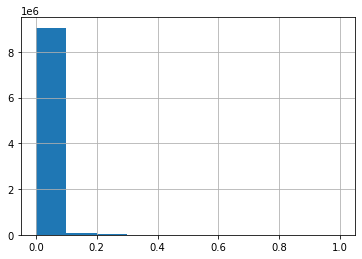

In [15]:
postings['anger'].hist()

In [16]:
survey_grouped = survey_sub.groupby('welle').resample('1d').mean()
survey_grouped.index = survey_grouped.index.droplevel('welle')
survey_grouped

,welle,co05_01
wave_end,,
2020-05-05,1.0,1.639361
2020-05-28,2.0,1.612935
2020-06-17,3.0,1.617383
2020-07-08,4.0,2.043000
2020-07-30,5.0,2.285000
2020-08-22,6.0,2.093812
2020-09-14,7.0,2.126747
2020-09-29,8.0,2.158000
2020-10-21,9.0,2.120159


<AxesSubplot:xlabel='wave_end'>

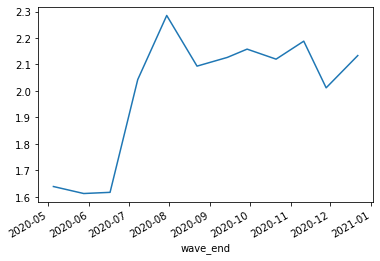

In [17]:
survey_grouped['co05_01'].plot()

### Plots

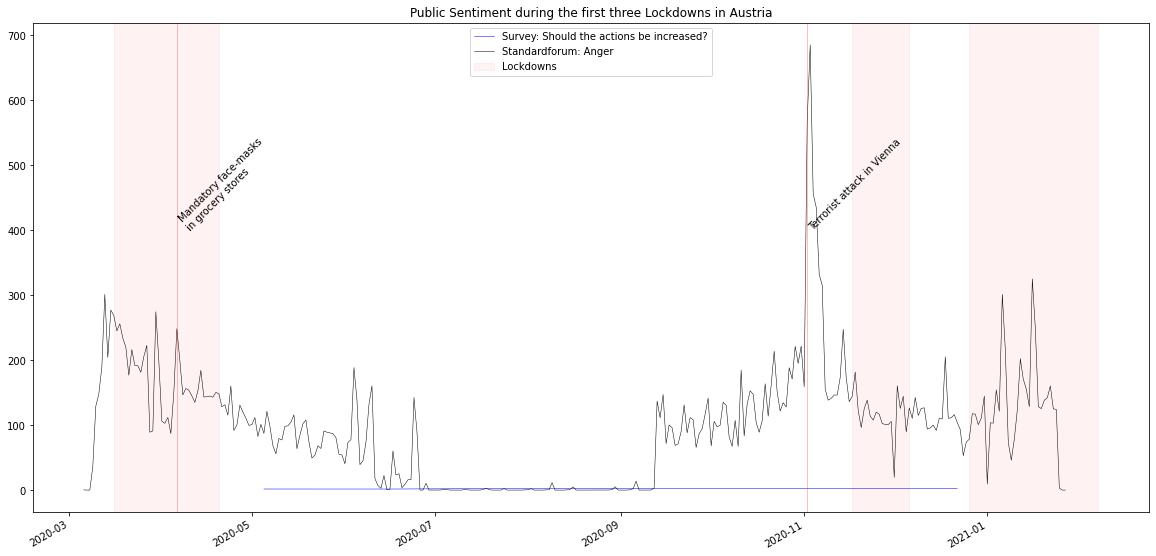

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.plot(survey_sub.resample('1d').sum().loc[start:end, 'co05_01'], linestyle='-', linewidth=0.5, label='Maßnahmenänderung')
ax.plot(survey_grouped['co05_01'].index, survey_grouped['co05_01'], linestyle='-', linewidth=0.5, label='Survey: Should the actions be increased?', color='blue')
ax.plot(postings.resample('1d').sum().loc[start:end, 'anger'], linestyle='-', linewidth=0.5, label='Standardforum: Anger', color='black')

ax.axvspan(pd.to_datetime(start_lockdown1), pd.to_datetime(end_lockdown1), color='red', alpha=0.05, label="Lockdowns")
ax.axvspan(pd.to_datetime(start_lockdown2), pd.to_datetime(end_lockdown2), color='red', alpha=0.05)
ax.axvspan(pd.to_datetime(start_lockdown3), pd.to_datetime(end_lockdown3), color='red', alpha=0.05)

ax.axvline(pd.to_datetime('2020-04-06'), linewidth=0.5, color='red', alpha=0.5)
ax.text(x=pd.to_datetime('2020-04-06'), y=400, s='Mandatory face-masks\nin grocery stores', rotation=45)
ax.axvline(pd.to_datetime('2020-11-02'), linewidth=0.5, color='red', alpha=0.5)
ax.text(x=pd.to_datetime('2020-11-02'), y=400, s='Terrorist attack in Vienna', rotation=45)


fig.autofmt_xdate()
ax.set_ylabel("")
ax.set_title("Public Sentiment during the first three Lockdowns in Austria")
ax.legend()